In [783]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.utils import shuffle

from IPython.display import Image
from IPython.core.display import HTML 




In [784]:
all_years = pd.read_csv('all_years.csv') 
role = pd.read_csv('player_roles_all_year.csv') 

In [785]:
balls = []
runs = []
avg = []
srate2 = []
balls2 = []
runs2 = []
avg2 = []
srate = []
batsman = []
year = []
base_price  = []
buy_price  = []
for index, row in all_years.iterrows():
    
    
    
    
    
    pname = str(row['player_name'].replace(' ','+'))
    #print pname
    prole = role[role['pname'].str.find(pname) != -1] 
    if(len(prole) == 0):
        continue
    prole = prole.iloc[0]['role']
    
    fname = 'score_files/' + str(row['year']) + '_t20_' + pname + '.csv'
    #print fname
    fname2 =  'score_files/' + str(row['year']) + '_listA_' + pname + '.csv'
    
    #print fname
    if(prole == 0):
        continue
        
    if (os.path.isfile(fname) and os.path.isfile(fname2)):
        data = pd.read_csv(fname)
        
        data['balls']  =  data['balls'].astype('str') 
        data = data[data['balls'] != '\xc2\xa0']
        
        data['balls']  =  data['balls'].astype('float') 
        data['runs']  =  data['runs'].astype('float') 
        
        #data = data[data['runs'] != '\xc2\xa0']
        if(len(data) < 2):
            continue
            
        bprice  = str(row['base_price'].replace(',',''))
        bprice  = bprice.replace('$','')
        bprice = float(bprice)
        
        b2price  = str(row['buy_price'].replace(',',''))
        b2price  = b2price.replace('$','')
        b2price = float(b2price)
        
        if(row['year'] == 2011):
            b2price = b2price*45.386213
            bprice = bprice*45.386213
            
        if(row['year'] == 2012):
            b2price = b2price*49.157835
            bprice = bprice*49.157835
            
        if(row['year'] == 2013):
            b2price = b2price*53.847350
            bprice = bprice*53.847350
        
        if(row['year'] >= 2014):
            b2price = b2price*100000
            bprice = bprice*100000
            
        
        
        
        
        
        #t20 done now odi 
        
        
        
        
        data2 = pd.read_csv(fname2)
        
        data2['balls']  =  data2['balls'].astype('str') 
        data2 = data2[data2['balls'] != '\xc2\xa0']
        
        data2['balls']  =  data2['balls'].astype('float') 
        data2['runs']  =  data2['runs'].astype('float') 
        
        #data = data[data['runs'] != '\xc2\xa0']
        if(len(data2) < 2):
            continue
            
     
        batsman.append(pname)
        base_price.append(bprice) 
        buy_price.append(b2price)
        year.append(row['year'])
        balls.append(np.sum(data['balls']))
        runs.append(np.sum(data['runs']))
        avg.append(np.sum(data['runs'])/(len(data)))
        srate.append(np.mean([(r/b)*100 for r,b in zip(data['runs'], data['balls'])]))
        
        balls2.append(np.sum(data2['balls']))
        runs2.append(np.sum(data2['runs']))
        avg2.append(np.sum(data2['runs'])/(len(data2)))
        srate2.append(np.mean([(r/b)*100 for r,b in zip(data2['runs'], data2['balls'])]))
        
             
        
    else:
        print 'file no exists'
        print fname
        #continue

file no exists
score_files/2013_t20_MoisÃĐs+Henriques.csv
file no exists
score_files/2014_t20_Abhishek+Nayar.csv
file no exists
score_files/2014_t20_Yalaka+Venugopal+Rao.csv
file no exists
score_files/2014_t20_Iqbal+Abdullah.csv
file no exists
score_files/2014_t20_Vijay+Shankar.csv
file no exists
score_files/2016_t20_Armaan+Jaffer.csv
file no exists
score_files/2016_t20_Vijay+Shankar.csv
file no exists
score_files/2016_t20_Mahipal+Lomror.csv


In [786]:
import math
alldata = pd.DataFrame()
alldata['batsman'] = batsman
alldata['base_price'] = base_price
alldata['buy_price'] = buy_price

alldata['runs'] = runs
alldata['balls'] = balls
alldata['avg'] = avg
alldata['srate'] = srate

alldata['runs2'] = runs2
alldata['balls2'] = balls2
alldata['avg2'] = avg2
alldata['srate2'] = srate2

alldata['netruns'] = alldata['runs'] + alldata['runs2']
alldata['year'] = year


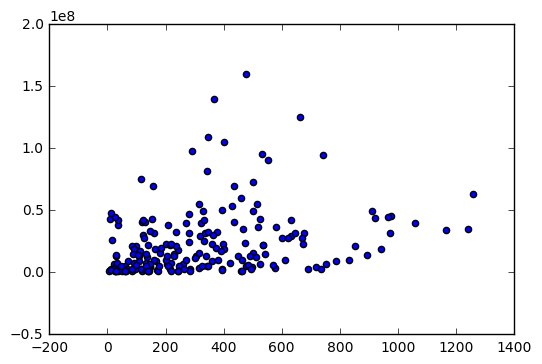

In [788]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs( (y_true - y_pred) / y_true)) * 100

plt.scatter(alldata['runs'],alldata['buy_price'])

initil len is  201
total is  101
trains et  90
11
261.7522204


/home/fsftn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


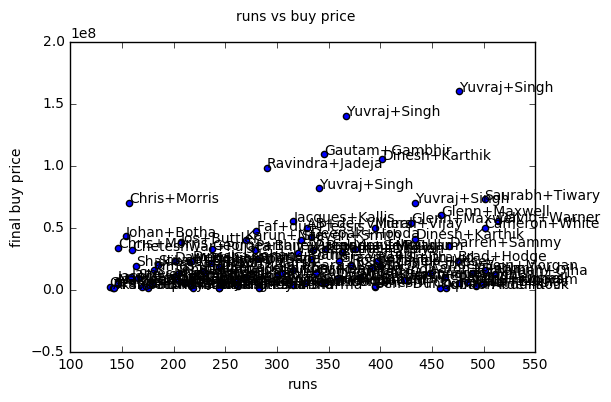

In [789]:
print 'initil len is ', len(alldata)
alldata_sorted = alldata.sort(['runs'])
alldata_sorted = alldata_sorted[60:] 

l =  len(alldata_sorted)
alldata_sorted = alldata_sorted[:(l-40)]
x =  np.array(alldata_sorted['runs'])
y =  np.array(alldata_sorted['buy_price'])

names= np.array(alldata_sorted['batsman'])

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(names):
    ax.annotate(txt, (x[i],y[i]))
fig.suptitle('runs vs buy price')
plt.xlabel('runs')
plt.ylabel('final buy price')

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

 
model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),   n_estimators=360)
model = RandomForestRegressor()
model = GradientBoostingRegressor()
len_data = len(alldata_sorted)
print 'total is ',len_data
train_set = alldata_sorted[:int(len_data*0.9)]
print 'trains et ',len(train_set)
test_set = alldata_sorted[len(train_set):]


ans =  'buy_price'
 

cols = ['netruns', 'base_price']
cols = ['runs','base_price','avg2','runs2','year']

a = train_set[cols]
model.fit(a,train_set[ans])
test_feat = test_set[cols]

vals = np.array(model.predict(test_feat))
preds = model.predict(test_set[cols])
print len(vals)
print mean_absolute_percentage_error(np.array(test_set[ans]), np.array(preds))

In [790]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor


/home/fsftn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/fsftn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
11
169.532763519


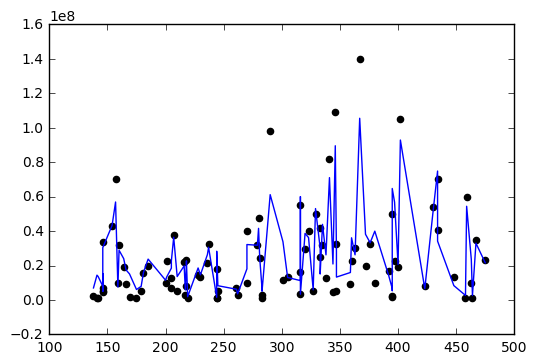

In [791]:
model  = XGBRegressor(4,learning_rate=0.4)
model = RandomForestRegressor()
pruns = np.array(train_set['runs'])

cols = ['runs','base_price','runs3','netruns','avg','avg2']

train_set['runs3'] = np.array([math.sqrt(i) for i in pruns])

pruns = np.array(test_set['runs'])
test_set['runs3'] = np.array([math.sqrt(i) for i in pruns])




test_set_feat = test_set[cols]
a = train_set[cols]
model.fit(a,train_set[ans])
print model
preds = model.predict(test_set[cols])
print len(vals)
print mean_absolute_percentage_error(np.array(test_set[ans]), np.array(preds))



plt.scatter(train_set['runs'], train_set[ans],  color='black')
plt.plot( train_set['runs'] ,  model.predict(train_set[cols]), color='blue')
plt.show()

In [792]:
valu2 = np.array(test_set[ans])
valu = preds
for i in range(0,len(valu)):
    print valu[i], valu2[i], test_set['batsman'].iloc[i]
test_set

48499092.5875 5384735.0 Phillip+Hughes
45322002.515 160000000.0 Yuvraj+Singh
17219414.495 6000000.0 Andre+Russell
46309165.1525 13615863.9 JP+Duminy
9282956.575 3000000.0 Sam+Billings
10247648.749 4538621.3 Colin+Ingram
58623699.17 49924834.3 Cameron+White
25532813.9175 15885174.55 Eoin+Morgan
7172347.608 72617940.8 Saurabh+Tiwary
7909027.449 12254277.51 Naman+Ojha
69546292.3875 55000000.0 David+Warner


,batsman,base_price,buy_price,runs,balls,avg,srate,runs2,balls2,avg2,srate2,netruns,year,runs3
80,Phillip+Hughes,5384735.0,5.384735e+06,476,365,52.888889,120.654323,1136,1359,56.800000,74.217613,1612,2013,21.817424
147,Yuvraj+Singh,20000000.0,1.600000e+08,476,380,25.052632,103.514195,376,460,26.857143,73.755764,852,2015,21.817424
123,Andre+Russell,5000000.0,6.000000e+06,484,297,19.360000,143.967757,104,80,10.400000,135.277778,588,2014,22.000000
37,JP+Duminy,9077242.6,1.361586e+07,490,396,22.272727,120.347758,473,524,36.384615,83.813062,963,2011,22.135944
187,Sam+Billings,3000000.0,3.000000e+06,493,359,23.476190,127.048699,586,592,34.470588,89.390452,1079,2016,22.203603
52,Colin+Ingram,4538621.3,4.538621e+06,499,393,26.263158,112.609979,1096,1235,42.153846,81.240316,1595,2011,22.338308
6,Cameron+White,13615863.9,4.992483e+07,501,372,19.269231,NaN,1081,1261,37.275862,76.935787,1582,2011,22.383029
31,Eoin+Morgan,9077242.6,1.588517e+07,501,352,25.050000,121.350258,711,769,37.421053,82.254011,1212,2011,22.383029
4,Saurabh+Tiwary,4538621.3,7.261794e+07,501,367,27.833333,115.828172,170,210,18.888889,72.989168,671,2011,22.383029
40,Naman+Ojha,4538621.3,1.225428e+07,511,412,25.550000,105.402173,461,500,38.416667,69.913648,972,2011,22.605309


In [923]:
#--------------------------------------------
alldata['runs3'] = np.array([math.sqrt(i) for i in alldata['runs']])

alldata_sorted = alldata.sort(['runs'])
 
alldata_sorted = alldata_sorted[10:] 
 
alldata_sorted = alldata_sorted.sort(['buy_price'])
alldata_sorted = alldata_sorted[:l-25]

len_data = len(alldata_sorted)
train_set = alldata_sorted[:int(len_data*0.90)]
print len(train_set)
test_set = alldata_sorted[len(train_set):]
print len(test_set)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
#-------------------------------------------------------------
 
modelA = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),   n_estimators=360)

ans =  'buy_price'
 

cols = ['runs','base_price']
cols = ['runs','base_price','avg2','netruns']

a = train_set[cols]
modelA.fit(train_set[cols],train_set[ans])
test_feat = test_set[cols]

vals1 = np.array(modelA.predict(test_feat))
print mean_absolute_percentage_error(np.array(test_set[ans]),vals1)

104
12
31.9258584811


/home/fsftn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/fsftn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [935]:
#--------------------------------------------
alldata['runs3'] = np.array([math.sqrt(i) for i in alldata['runs']])

alldata_sorted = alldata.sort(['runs'])
 
alldata_sorted = alldata_sorted[10:] 
 
alldata_sorted = alldata_sorted.sort(['buy_price'])
alldata_sorted = alldata_sorted[:l-25]

len_data = len(alldata_sorted)
train_set = alldata_sorted[:int(len_data*0.90)]
print len(train_set)
test_set = alldata_sorted[len(train_set):]
print len(test_set)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
#-------------------------------------------------------------

model2 =  RandomForestRegressor()

ans =  'buy_price'
cols = ['runs3','base_price']
#cols = ['runs','runs2','netruns','base_price','avg','avg2']

a = train_set[cols]
model2.fit(a,train_set[ans])
test_feat = test_set[cols]

vals2 = np.array(model2.predict(test_feat))
print mean_absolute_percentage_error(np.array(test_set[ans]),vals2)

104
12
30.2751130967


/home/fsftn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/fsftn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [959]:
#--------------------------------------------
alldata['runs3'] = np.array([math.sqrt(i) for i in alldata['runs']])

alldata_sorted = alldata.sort(['runs'])
 
alldata_sorted = alldata_sorted[10:] 
 
alldata_sorted = alldata_sorted.sort(['buy_price'])
alldata_sorted = alldata_sorted[:l-25]

len_data = len(alldata_sorted)
train_set = alldata_sorted[:int(len_data*0.90)]
print len(train_set)
test_set = alldata_sorted[len(train_set):]
print len(test_set)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
#-------------------------------------------------------------

model3 =  DecisionTreeRegressor(min_samples_split=2, min_samples_leaf=3)

ans =  'buy_price'
 

cols = ['runs','base_price','avg2','netruns','avg','runs2','year']
a = train_set[cols]
model3.fit(a,train_set[ans])
test_feat = test_set[cols]

vals3 = np.array(model3.predict(test_feat))
#print len(vals)
print mean_absolute_percentage_error(np.array(test_set[ans]),vals3)

104
12
29.9889486708


/home/fsftn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/fsftn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [862]:
from sklearn import tree

#dot_file = tree.export_graphviz(model3.tree_, out_file='tree_d1.dot',feature_names= cols )  #export the tree to .dot file
dot_file = tree.export_graphviz(model3.tree_, out_file='tree_d1.dot') #export the tree to .dot file

from subprocess import check_call
check_call(['dot','-Tpng','tree_d1.dot','-o','Output.png'])
#Image(url= "Output.png")

0

In [975]:
print mean_absolute_percentage_error(np.array(test_set[ans]),vals3)
print mean_absolute_percentage_error(np.array(test_set[ans]),vals2)
print mean_absolute_percentage_error(np.array(test_set[ans]),vals1)
vals = [0]*(len(vals1))
for i in range(0,len(vals1)):
    vals[i] = (vals1[i]+vals2[i]+vals3[i])/3
    #print test_set[ans].iloc[i]-vals1[i],test_set[ans].iloc[i]-vals2[i],test_set[ans].iloc[i]-vals3[i],test_set[ans].iloc[i]
print mean_absolute_percentage_error(np.array(test_set[ans]),vals)

29.9889486708
30.2751130967
31.9258584811
30.7299734162
